## Grupo 23

**Nombre:** Raúl Miguel Carrero Martín 
**Nia**: 100451286 
**Grupo de clase**: 81

**Nombre:** Gonzalo Vela Sacristán
**Nia**: 100472334
**Grupo de clase**: 84

Enlace a Github: https://github.com/RaulCarrero02/G23.P2.100451286.100472334.git

In [1]:
%pip install numpy
%pip install pandas
%pip install matplotlib
%pip install seaborn
%pip install pickle
%pip install time
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


You are using pip version 10.0.1, however version 24.0 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You are using pip version 10.0.1, however version 24.0 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You are using pip version 10.0.1, however version 24.0 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You are using pip version 10.0.1, however version 24.0 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


  Could not find a version that satisfies the requirement pickle (from versions: )
No matching distribution found for pickle
You are using pip version 10.0.1, however version 24.0 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


  Could not find a version that satisfies the requirement time (from versions: )
No matching distribution found for time
You are using pip version 10.0.1, however version 24.0 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You are using pip version 10.0.1, however version 24.0 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


# Importación de los datos y librerias

In [2]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
import time
from sklearn.datasets import make_blobs

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib import style
style.use('ggplot') 


# Preprocesado y modelado
# ==============================================================================
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale, StandardScaler
from sklearn.metrics import silhouette_score, silhouette_samples
from scipy.spatial.distance import cdist
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.datasets import make_blobs
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch



## Importar los datos

In [3]:
data = pd.read_csv("data/stars_data.csv")
display(data)

# Copiamos los datos y los estandarizamos
# ==============================================================================
data_df = data[['Temperature', 'L', 'R', 'A_M', 'Color', 'Spectral_Class']].copy()

print("Cantidad de filas y columnas: ", data_df.shape)
print("Nombre de las columnas: ", data_df.columns)




,Temperature,L,R,A_M,Color,Spectral_Class
0,3068,0.002400,0.1700,16.12,Red,M
1,3042,0.000500,0.1542,16.60,Red,M
2,2600,0.000300,0.1020,18.70,Red,M
3,2800,0.000200,0.1600,16.65,Red,M
4,1939,0.000138,0.1030,20.06,Red,M
...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,Blue,O
236,30839,834042.000000,1194.0000,-10.63,Blue,O
237,8829,537493.000000,1423.0000,-10.73,White,A
238,9235,404940.000000,1112.0000,-11.23,White,A


Cantidad de filas y columnas:  (240, 6)
Nombre de las columnas:  Index(['Temperature', 'L', 'R', 'A_M', 'Color', 'Spectral_Class'], dtype='object')


In [4]:
# Mostramos las columnas con valores nulos
print("Columnas con valores nulos: ")
print(data_df.isnull().sum())

Columnas con valores nulos: 
Temperature       0
L                 0
R                 0
A_M               0
Color             0
Spectral_Class    0
dtype: int64


In [5]:
# Mostramos las columnas con NaN
print("Columnas con NaN: ")
print(data_df.isna().sum())

Columnas con NaN: 
Temperature       0
L                 0
R                 0
A_M               0
Color             0
Spectral_Class    0
dtype: int64


In [6]:
# Describimos las variables
print("Estadísticas de las variables:")
print(data_df.describe())

Estadísticas de las variables:
        Temperature              L            R         A_M
count    240.000000     240.000000   240.000000  240.000000
mean   10497.462500  107188.361635   237.157781    4.382396
std     9552.425037  179432.244940   517.155763   10.532512
min     1939.000000       0.000080     0.008400  -11.920000
25%     3344.250000       0.000865     0.102750   -6.232500
50%     5776.000000       0.070500     0.762500    8.313000
75%    15055.500000  198050.000000    42.750000   13.697500
max    40000.000000  849420.000000  1948.500000   20.060000


# 1.- Kmeans 

In [7]:

def distancia(a, b):
    return np.sqrt(np.sum((a - b)**2))

def kmeans(datos, k, max_iter=100):
    np.random.seed(23)
    # Inicialización aleatoria de los centroides
    centroides_indices = np.random.choice(len(datos), k, replace=False)
    centroides = datos[centroides_indices]
    threshold = 0.001
    asignaciones = []

    for iteration in range(max_iter):
        # Asignar cada punto al centroide más cercano
        asignaciones = []
        for dato in datos:
            distancias = []
            for centroide in centroides:
                distancias.append(distancia(dato, centroide))
            asignacion = np.argmin(distancias)
            asignaciones.append(asignacion)

        # Actualizar los centroides
        nuevos_centroides = []
        for j in range(k):
            puntos_asignados = []
            for i in range(len(datos)):
                punto_asignado = [datos[i], asignaciones[i]]
                if punto_asignado[1] == j:
                    puntos_asignados.append(datos[i])
            nuevo_centroide = np.mean(puntos_asignados, axis=0)
            nuevos_centroides.append(nuevo_centroide)
        nuevos_centroides = np.array(nuevos_centroides)

        d_centroides = []
        for i in range(k):
            d_centroides.append(distancia(centroides[i], nuevos_centroides[i]))
        if np.max(d_centroides) < threshold:
            break

        centroides = nuevos_centroides
    print("Iteración final: ", iteration)
    print("Centroides finales: ", nuevos_centroides )
    return centroides, asignaciones

La función distancia(a, b) calcula la distancia euclidiana entre dos puntos en el espacio de características. Utiliza la función np.sqrt de NumPy para calcular la raíz cuadrada de la suma de los cuadrados de las diferencias entre las coordenadas de los puntos. La función kmeans(datos, k, max_iter=100) toma tres argumentos de entrada datos, klusters y máximas iteraciones. Primero se inicializa aleatoriamente un conjunto de centroides iniciales a partir de los datos proporcionados. Luego, se asignan todos los puntos de datos al centroide más cercano. Después, se actualizan los centroides calculando la media de todos los puntos asignados a cada centroide. Este proceso de asignación y actualización de centroides se repite hasta que se alcanza un criterio de detención. En este caso, el criterio de detención es que la diferencia entre los centroides antiguos y los nuevos sea menor que el threshold, o se alcanza el número máximo de iteraciones (max_iter)

Comparación

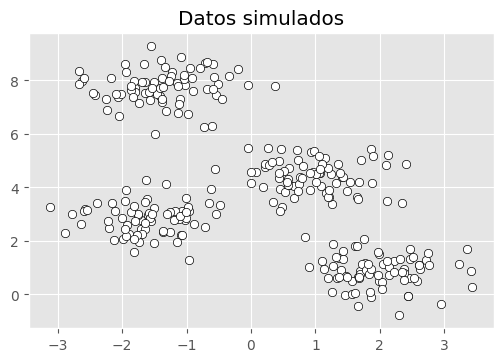

In [8]:
# Simulación de datos
X, y = make_blobs(
    n_samples    = 300,
    n_features   = 2,
    centers      = 4,
    cluster_std  = 0.60,
    shuffle      = True,
    random_state = 0
)

fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.scatter(
    x = X[:, 0],
    y = X[:, 1],
    c = 'white',
    marker    = 'o',
    edgecolor = 'black',
)
ax.set_title('Datos simulados');

Simulamos datos con la función make blobs para probar nuestra función k-means

Iteración final:  3
Centroides finales:  [[ 0.94973532  4.41906906]
 [-1.58438467  2.83081263]
 [ 1.98258281  0.86771314]
 [-1.37324398  7.75368871]]


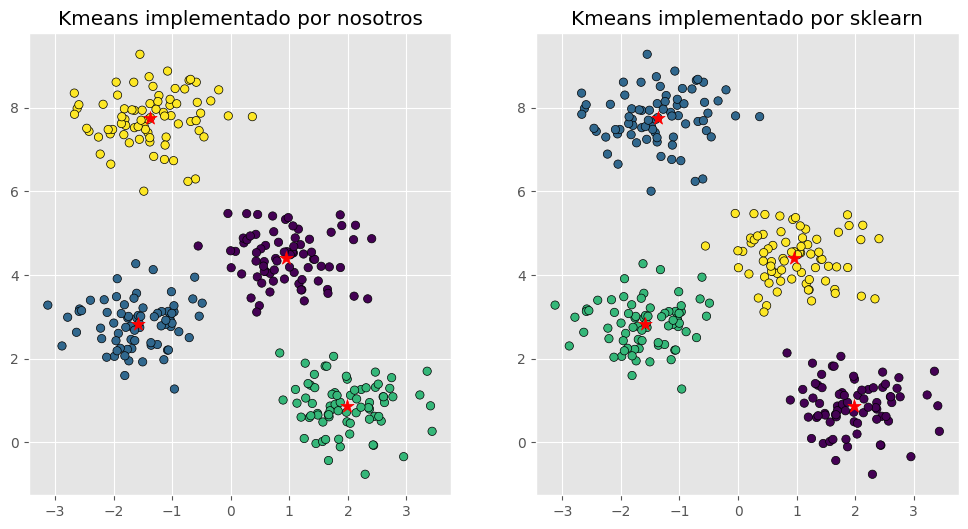

In [9]:
# Kmeans con 4 clusters
centroides, asignaciones = kmeans(X, 4)
# Con la función kmeans de sklearn
kmeans_sklearn = KMeans(n_clusters=4, random_state=23).fit(X)

# Representación gráfica
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].scatter(
    x = X[:, 0],
    y = X[:, 1],
    c = asignaciones,
    cmap = 'viridis',
    marker    = 'o',
    edgecolor = 'black',
)
ax[0].scatter(
    x = centroides[:, 0],
    y = centroides[:, 1],
    c = 'red',
    s = 100,
    marker = '*'
)
ax[0].set_title('Kmeans implementado por nosotros')

ax[1].scatter(
    x = X[:, 0],
    y = X[:, 1],
    c = kmeans_sklearn.labels_,
    cmap = 'viridis',
    marker    = 'o',
    edgecolor = 'black',
)
ax[1].scatter(
    x = kmeans_sklearn.cluster_centers_[:, 0],
    y = kmeans_sklearn.cluster_centers_[:, 1],
    c = 'red',
    s = 100,
    marker = '*'
)
ax[1].set_title('Kmeans implementado por sklearn');


Aquí observamos la diferencia de resultados con los datos simulados, entre nuestra función creada y la función k-means de skicit learn, vemos que a rangos generales son muy similares en los resultados

# 2.- Encoding de los datos categóricos

Primero observamos los valores de las variables categóricas

In [10]:
print("Valores de la columna Color: ")
print(data_df.Color.unique())

print("Valores de la columna Spectral_Class: ")
print(data_df.Spectral_Class.unique())

Valores de la columna Color: 
['Red' 'Blue White' 'White' 'Yellowish White' 'Blue white'
 'Pale yellow orange' 'Blue' 'Blue-white' 'Whitish' 'yellow-white'
 'Orange' 'White-Yellow' 'white' 'yellowish' 'Yellowish' 'Orange-Red'
 'Blue-White']
Valores de la columna Spectral_Class: 
['M' 'B' 'A' 'F' 'O' 'K' 'G']


Mapeamos los valores obtenidos de las columnas *Color* y *Spectral Class*.

In [11]:
# Establecemos una unificación de colores:
mapping_color = { 
    'Red': ['Red'],
    'Orange-Red': ['Orange-Red'],
    'Orange': ['Orange'],
    'Yellow-Orange': ['Pale yellow orange'],
    'Yellow': ['yellowish', 'Yellowish'],
    'White-Yellow': ['Yellowish White', 'yellow-white', 'White-Yellow'],
    'White': ['White', 'Whitish', 'white'],
    'Blue-White': ['Blue White', 'Blue white', 'Blue-white', 'Blue-White'],
    'Blue': ['Blue'],
}

# Establecemos una unificación de colores:
mapping_spectral = {
    'M': ['M'],
    'K': ['K'],
    'G': ['G'],
    'F': ['F'],
    'A': ['A'],
    'B': ['B'],
    'O': ['O'],
}

In [12]:
# Mapeamos los datos
for target_color, source_colors in mapping_color.items():
  data_df.loc[data_df.Color.isin(source_colors), 'Color'] = target_color

print("Valores de la columna Color: ")
print(data_df.Color.unique())

Valores de la columna Color: 
['Red' 'Blue-White' 'White' 'White-Yellow' 'Yellow-Orange' 'Blue' 'Orange'
 'Yellow' 'Orange-Red']


## 2.1.- One-Hot-Encoding

In [13]:
one_hot_df = data_df.copy()

encoder = OneHotEncoder()

# Ajustamos el codificador y transformamos las columnas
one_hot_encoded = encoder.fit_transform(one_hot_df[['Color', 'Spectral_Class']])

# Cogemos los nombres de las nuevas columnas
feature_names = encoder.get_feature_names_out(['Color', 'Spectral_Class'])

# Creamos un DataFrame con los datos transformados
one_hot_encoded_df = pd.DataFrame(one_hot_encoded.toarray(), columns=feature_names)

# Eliminamos las columnas originales
one_hot_df = one_hot_df.drop(columns=['Color', 'Spectral_Class'])

# Añadimos las nuevas columnas
one_hot_df = pd.concat([one_hot_df, one_hot_encoded_df], axis=1)

display(one_hot_df)


,Temperature,L,R,A_M,Color_Blue,Color_Blue-White,Color_Orange,Color_Orange-Red,Color_Red,Color_White,Color_White-Yellow,Color_Yellow,Color_Yellow-Orange,Spectral_Class_A,Spectral_Class_B,Spectral_Class_F,Spectral_Class_G,Spectral_Class_K,Spectral_Class_M,Spectral_Class_O
0,3068,0.002400,0.1700,16.12,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,3042,0.000500,0.1542,16.60,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2600,0.000300,0.1020,18.70,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2800,0.000200,0.1600,16.65,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1939,0.000138,0.1030,20.06,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
236,30839,834042.000000,1194.0000,-10.63,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
237,8829,537493.000000,1423.0000,-10.73,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
238,9235,404940.000000,1112.0000,-11.23,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


Hacemos un one hot encoding para transformar los datos de variables categóricas a númericas con el algoritmo one hot encoding de asignación de valor

## 2.2.- Ordinal Encoding

In [14]:
# Obtenemos los colores ordenados (directamente del mapping!)
colors = list(mapping_color.keys())


oe = OrdinalEncoder(categories=[colors])
color_encoded = oe.fit_transform(data_df.Color.values.reshape(-1, 1))


# Obtenemos los colores ordenados (directamente del mapping!)
spectral = list(mapping_spectral.keys())


oe = OrdinalEncoder(categories=[spectral])
spectral_encoded = oe.fit_transform(data_df.Spectral_Class.values.reshape(-1, 1))

In [15]:
ordinal_df = data_df.copy()

# cambiamos los valores de las columnas categóricas a numéricas
ordinal_df['Color'] = color_encoded
ordinal_df['Spectral_Class'] = spectral_encoded

display(ordinal_df)


,Temperature,L,R,A_M,Color,Spectral_Class
0,3068,0.002400,0.1700,16.12,0.0,0.0
1,3042,0.000500,0.1542,16.60,0.0,0.0
2,2600,0.000300,0.1020,18.70,0.0,0.0
3,2800,0.000200,0.1600,16.65,0.0,0.0
4,1939,0.000138,0.1030,20.06,0.0,0.0
...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,8.0,6.0
236,30839,834042.000000,1194.0000,-10.63,8.0,6.0
237,8829,537493.000000,1423.0000,-10.73,6.0,4.0
238,9235,404940.000000,1112.0000,-11.23,6.0,4.0


Hacemos Ordinal Encoding de las variables categoricas asignando un valor segun la escala especificada en el enunciado siendo M la la asociación mas fría y O la mas caliente por tanto los valores se asignan de 0 a 8 respectivamente.

# 3.- Modelos

## 3.1- PCA

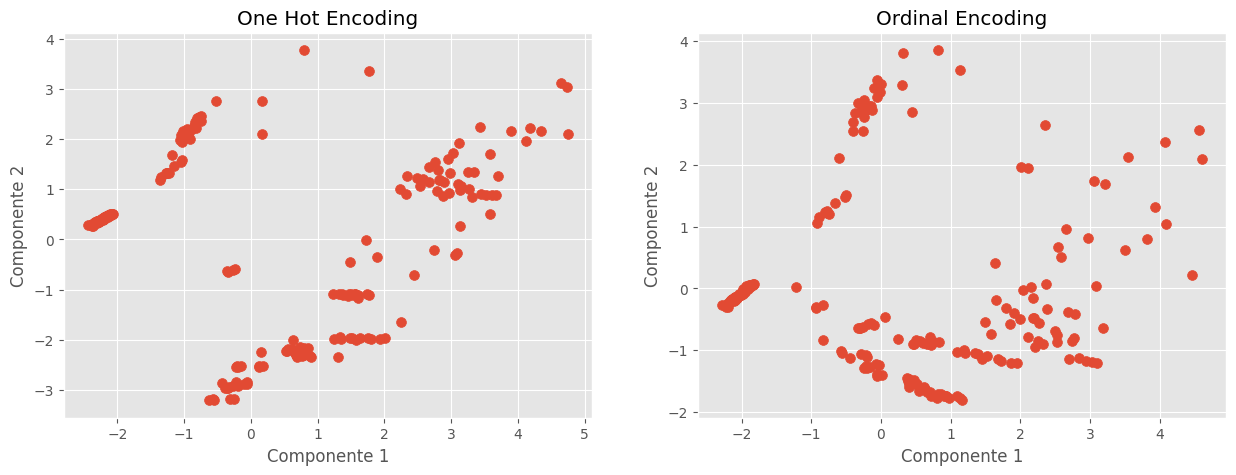

In [16]:
scaler = StandardScaler()
pca = PCA(n_components=2)

one_hot_scaled = scaler.fit_transform(one_hot_df)
ordinal_scaled = scaler.fit_transform(ordinal_df)

# Reducción de la dimensionalidad

X_one_hot_pca = pca.fit_transform(one_hot_scaled)
X_ordinal_pca = pca.fit_transform(ordinal_scaled)

# Represenantamos los datos en dos gráficas diferentes
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

axs[0].scatter(X_one_hot_pca[:, 0], X_one_hot_pca[:, 1], s=50)
axs[0].set_title('One Hot Encoding')
axs[0].set_xlabel('Componente 1')
axs[0].set_ylabel('Componente 2')

axs[1].scatter(X_ordinal_pca[:, 0], X_ordinal_pca[:, 1], s=50)
axs[1].set_title('Ordinal Encoding')
axs[1].set_xlabel('Componente 1')
axs[1].set_ylabel('Componente 2')

plt.show()


Tras haber transformado los valores categóricos a númericos con los 2 métodos de transformación, asignandoles valores ordinales y a traves de la transformación one hot encoding, aplicamos un pca para reducir la dimensionalidad de los datos a 2 variables y para así poder ejecutar luego el k-means. Observamos la diferencia entre los PCA a la hora de simular los datos debido a los diferentes valores que toman las columnas 'color' y 'espectral class' tras las transformaciones. 

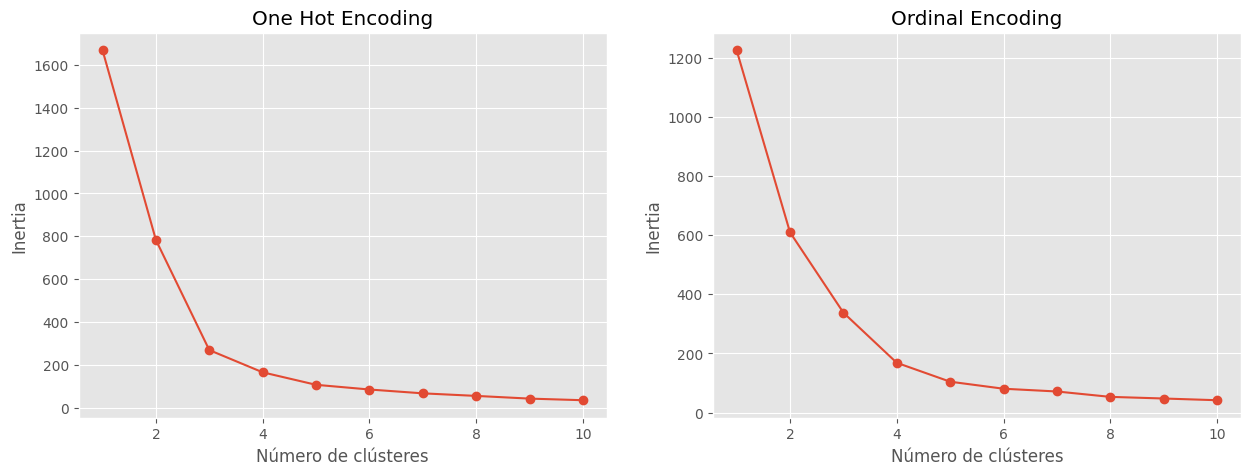

In [17]:

# Número óptimo de clústeres
# ==============================================================================
inertia_oh = []
inertia_ordinal = []
for i in range(1, 11):
    kmeans_inertia = KMeans(n_clusters=i, random_state=123).fit(X_ordinal_pca)
    inertia_ordinal.append(kmeans_inertia.inertia_)

for i in range(1, 11):
    kmeans_inertia = KMeans(n_clusters=i, random_state=123).fit(X_one_hot_pca)
    inertia_oh.append(kmeans_inertia.inertia_)

# Representación de los dato en dos gráficos
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

axs[0].plot(range(1, 11), inertia_oh, marker='o')
axs[0].set_title('One Hot Encoding')
axs[0].set_xlabel('Número de clústeres')
axs[0].set_ylabel('Inertia')

axs[1].plot(range(1, 11), inertia_ordinal, marker='o')
axs[1].set_title('Ordinal Encoding')
axs[1].set_xlabel('Número de clústeres')
axs[1].set_ylabel('Inertia')

plt.show()


El propósito de trazar este gráfico es identificar el punto de inflexión, donde la disminución en la inercia disminuye significativamente. Este punto indica el número óptimo de clústeres para el conjunto de datos dado. La elección del número de clústeres adecuado es crucial para obtener clústeres significativos y útiles en el análisis de los datos. Sin embargo en estas gráficas es poco visible el punto de inflexión por lo que recurriremos a otros métodos.

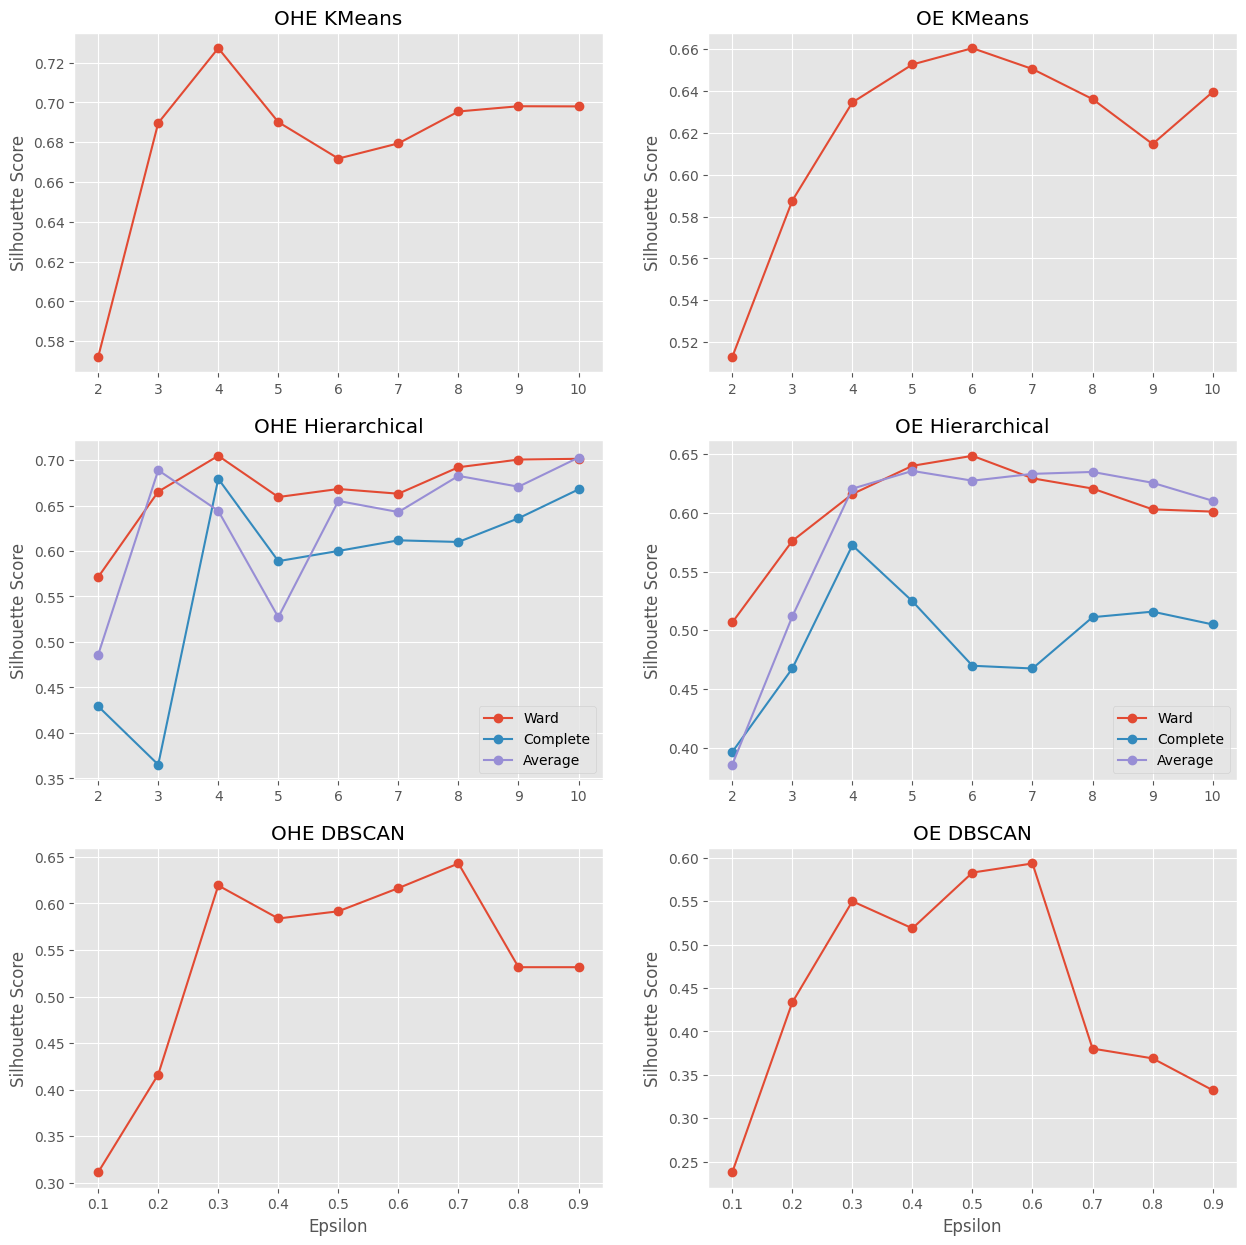

In [18]:
# Silhouette Score
silhouette_oh = []
silhouette_ordinal = []
for i in range(2, 11):
    kmeans_silhouette = KMeans(n_clusters=i, random_state=123).fit_predict(X_one_hot_pca)
    silhouette_oh.append(silhouette_score(X_one_hot_pca, kmeans_silhouette))

    kmeans_silhouette_oe = KMeans(n_clusters=i, random_state=123).fit_predict(X_ordinal_pca)
    silhouette_ordinal.append(silhouette_score(X_ordinal_pca, kmeans_silhouette_oe))

# silhouette for hierarchical clustering
silhouette_hc_oh = []
silhouette_hc_ordinal = []
silhouette_hierarchical_oh_complete = []
silhouette_hierarchical_ordinal_complete = []
silhouette_hierarchical_oh_average = []
silhouette_hierarchical_ordinal_average = []
for i in range(2, 11):
    hc = AgglomerativeClustering(n_clusters=i, linkage='ward').fit_predict(X_one_hot_pca)
    silhouette_hc_oh.append(silhouette_score(X_one_hot_pca, hc))
    hc = AgglomerativeClustering(n_clusters=i, linkage='complete').fit_predict(X_one_hot_pca)
    silhouette_hierarchical_oh_complete.append(silhouette_score(X_one_hot_pca, hc))
    hc = AgglomerativeClustering(n_clusters=i, linkage='average').fit_predict(X_one_hot_pca)
    silhouette_hierarchical_oh_average.append(silhouette_score(X_one_hot_pca, hc))

    hc = AgglomerativeClustering(n_clusters=i, linkage='ward').fit_predict(X_ordinal_pca)
    silhouette_hc_ordinal.append(silhouette_score(X_ordinal_pca, hc))
    hc = AgglomerativeClustering(n_clusters=i, linkage='complete').fit_predict(X_ordinal_pca)
    silhouette_hierarchical_ordinal_complete.append(silhouette_score(X_ordinal_pca, hc))
    hc = AgglomerativeClustering(n_clusters=i, linkage='average').fit_predict(X_ordinal_pca)
    silhouette_hierarchical_ordinal_average.append(silhouette_score(X_ordinal_pca, hc))


# silhouette for DBSCAN
silhouette_dbscan_oh = []
silhouette_dbscan_ordinal = []
for i in np.arange(0.1, 1, 0.1):
    dbscan = DBSCAN(eps=i).fit_predict(X_one_hot_pca)
    silhouette_dbscan_oh.append(silhouette_score(X_one_hot_pca, dbscan))

    dbscan = DBSCAN(eps=i).fit_predict(X_ordinal_pca)
    silhouette_dbscan_ordinal.append(silhouette_score(X_ordinal_pca, dbscan))

# en seis graficos tres para cada modelos de codificación
fig, axs = plt.subplots(3, 2, figsize=(15, 15))

axs[0, 0].plot(range(2, 11), silhouette_oh, marker='o')
axs[0, 0].set_title('OHE KMeans')
axs[0, 0].set_ylabel('Silhouette Score')

axs[0, 1].plot(range(2, 11), silhouette_ordinal, marker='o')
axs[0, 1].set_title('OE KMeans')
axs[0, 1].set_ylabel('Silhouette Score')

#agrupa en hierarchical por cada tipo de link
axs[1, 0].plot(range(2, 11), silhouette_hc_oh, marker='o')
axs[1, 0].plot(range(2, 11), silhouette_hierarchical_oh_complete, marker='o')
axs[1, 0].plot(range(2, 11), silhouette_hierarchical_oh_average, marker='o')
axs[1, 0].set_title('OHE Hierarchical')
axs[1, 0].set_ylabel('Silhouette Score')

axs[1, 1].plot(range(2, 11), silhouette_hc_ordinal, marker='o')
axs[1, 1].plot(range(2, 11), silhouette_hierarchical_ordinal_complete, marker='o')
axs[1, 1].plot(range(2, 11), silhouette_hierarchical_ordinal_average, marker='o')
axs[1, 1].set_title('OE Hierarchical')
axs[1, 1].set_ylabel('Silhouette Score')

#agrupa en dbscan por cada tipo de codificación
axs[2, 0].plot(np.arange(0.1,1,0.1), silhouette_dbscan_oh, marker='o')
axs[2, 0].set_title('OHE DBSCAN')
axs[2, 0].set_xlabel('Epsilon')
axs[2, 0].set_ylabel('Silhouette Score')

axs[2, 1].plot(np.arange(0.1,1,0.1), silhouette_dbscan_ordinal, marker='o')
axs[2, 1].set_title('OE DBSCAN')
axs[2, 1].set_xlabel('Epsilon')
axs[2, 1].set_ylabel('Silhouette Score')

axs[1, 0].legend(['Ward', 'Complete', 'Average'])
axs[1, 1].legend(['Ward', 'Complete', 'Average'])

plt.show()



El propósito de trazar estos gráficos es identificar el número óptimo de clústeres que maximiza el Silhouette Score y en caso del DBScan el epsilon que maximiza el silhouette. Un Silhouette Score más alto indica una mejor calidad de clustering. Por lo tanto, el número óptimo de los hiperparámetros generalmente se elige donde el Silhouette Score alcanza su valor máximo. Este metodo se puede aplicar a los modelos de agrupamiento elegidos por lo que se puede considerar una especie de ajuste de hiperparametros, pudiendo evaluar que parametro e optimo para cada modelo.
Para cada modelo el mejor hiperparámetro:
- One Hot Encoding (OHE):
    - Kmeans:
        - Clusters: 4
    - Hierarchical:
        - Linkage: ward
        - Clusters: 4
    - DBscan:
        - Epsilon: 0.7
- Ordinal Encoding (OE):
    - Kmeans:
        - Clusters: 6
    - Hierarchical:
        - Linkage: ward
        - Clusters: 6
    - DBscan:
        - Epsilon: 0.6

In [19]:
times_score = []
silhouette_scores = []

## 3.2.- Modelos para One Hot Encoding

Vamos a tratar 3 modelos distintos más el nuestro. 

El K-means esta basado en centroides y el número de clusters es especifico. El funcionamiento del K-means , empieza iniciando con K centroides aleatorios, luego asigna puntos al centroide más cercano y recalcula los centroides. Este proceso se repite hasta que los centroides convergen.

El Hierarchical clustering se basa en la estructura jerárquica. No es necesario especificar de antemano; puede generar un dendrograma que muestra la estructura jerárquica de los clusters y luego decidir el número de clusters cortando el dendrograma. Hay dos formas en las que funciona, puede ser aglomerativo (comenzando con cada punto como un cluster y fusionando clusters similares) o divisivo (comenzando con todos los puntos en un solo cluster y dividiéndolo en clusters más pequeños). Las decisiones de fusión o división se basan en medidas de distancia entre clusters o puntos.

El DBSCAN (Density-Based Spatial Clustering of Applications with Noise) esta centrado en la densidad y no es necesario especificar de antemano el número de clusters. Identifica clusters basado en regiones de alta densidad de puntos. Los puntos se clasifican como núcleo, borde o ruido, según la densidad de puntos dentro de su vecindad.

### Algoritmo Kmeans

Iteración final:  4
Centroides finales:  [[-0.21762153 -2.83162543]
 [-1.86065987  0.85169618]
 [ 1.14338483 -1.63542222]
 [ 3.1447558   1.36143512]]


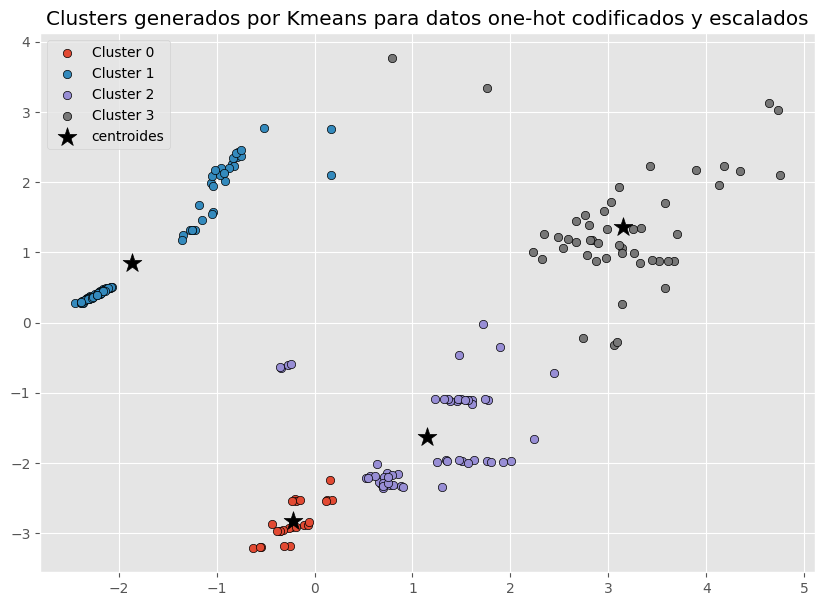

Tiempo de ejecución: 0.03314542770385742 segundos
Silhouette Score: 0.6400466302609082


In [20]:
# Aplicar KMeans a los datos transformados por PCA
n_clusters = 4
start = time.time()
centroides, asignaciones = kmeans(X_one_hot_pca, n_clusters)

end = time.time()

silhouette_kmeans = silhouette_score(X_one_hot_pca, asignaciones)

plt.figure(figsize=(10, 7))
for i in np.unique(asignaciones):
    plt.scatter(
        x = X_one_hot_pca[np.array(asignaciones) == i, 0],
        y = X_one_hot_pca[np.array(asignaciones) == i, 1],
        c = plt.rcParams['axes.prop_cycle'].by_key()['color'][i % len(plt.rcParams['axes.prop_cycle'].by_key()['color'])],
        marker    = 'o',
        edgecolor = 'black',
        label= f"Cluster {i}"
    )

plt.scatter(
    x = centroides[:, 0],
    y = centroides[:, 1],
    c = 'black',
    s = 200,
    marker = '*',
    label  = 'centroides'
)
plt.title('Clusters generados por Kmeans para datos one-hot codificados y escalados')
plt.legend()
plt.show()
print(f"Tiempo de ejecución: {end - start} segundos")
print(f"Silhouette Score: {silhouette_kmeans}")

times_score.append({"time": end - start, "algorithm": "Custom Kmeans"})
silhouette_scores.append({"score": silhouette_kmeans, "algorithm": "Custom Kmeans"})


### Kmeans scikit

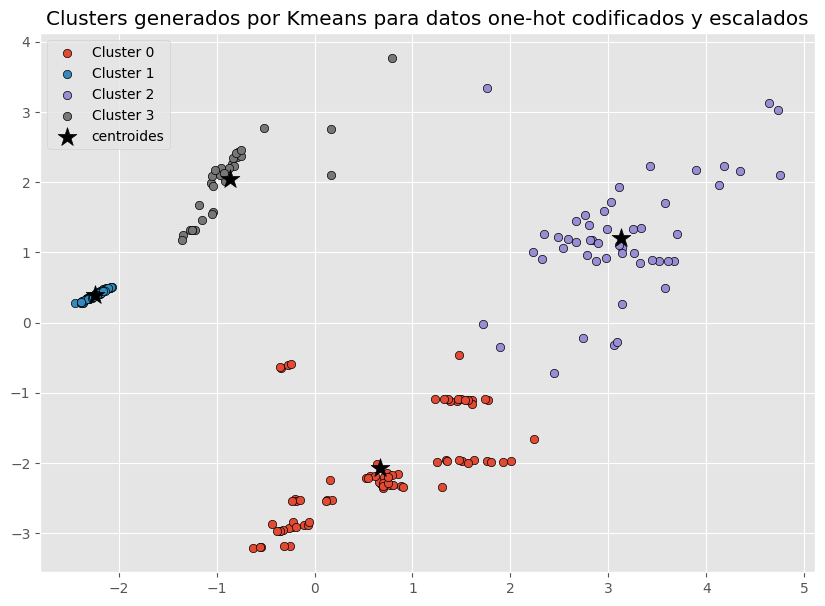

Tiempo de ejecución: 0.02464914321899414 segundos
Silhouette Score: 0.7272977616753254


In [21]:
# Kmeans with scikit-learn
start = time.time()
kmeans_scikit = KMeans(n_clusters=4, random_state=23)
kmeans_scikit.fit(X_one_hot_pca)
y_predict = kmeans_scikit.predict(X_one_hot_pca)

end = time.time()

# Show the silhouette score
silhouette = silhouette_score(X_one_hot_pca, y_predict)

plt.figure(figsize=(10, 7))
for i in np.unique(y_predict):
    plt.scatter(
        x = X_one_hot_pca[y_predict == i, 0],
        y = X_one_hot_pca[y_predict == i, 1],
        c = plt.rcParams['axes.prop_cycle'].by_key()['color'][i % len(plt.rcParams['axes.prop_cycle'].by_key()['color'])],
        marker    = 'o',
        edgecolor = 'black',
        label= f"Cluster {i}"
    )

plt.scatter(
    x = kmeans_scikit.cluster_centers_[:, 0],
    y = kmeans_scikit.cluster_centers_[:, 1],
    c = 'black',
    s = 200,
    marker = '*',
    label  = 'centroides'
)

plt.title('Clusters generados por Kmeans para datos one-hot codificados y escalados')
plt.legend()
plt.show()

print(f"Tiempo de ejecución: {end - start} segundos")
print(f"Silhouette Score: {silhouette}")

times_score.append({"time": end - start, "algorithm": "KMeans scikit-learn OHE"})
silhouette_scores.append({"score": silhouette, "algorithm": "KMeans scikit-learn OHE"})

Para una mayor profundización en el algoritmo Kmeans propio hemos decidido probarlo con nuestros datos, y podemos observar que los grupos creados entre el Kmeans de scikit y el propio son distintos, esto se puede deber a la inicialización de los centroides. En conclusión, nuestro Kmeans no ajusta los grupos tan bien como el de scikit cuando los datos son más dispersos y no tan aglomerados.

### Hierarchical cluster

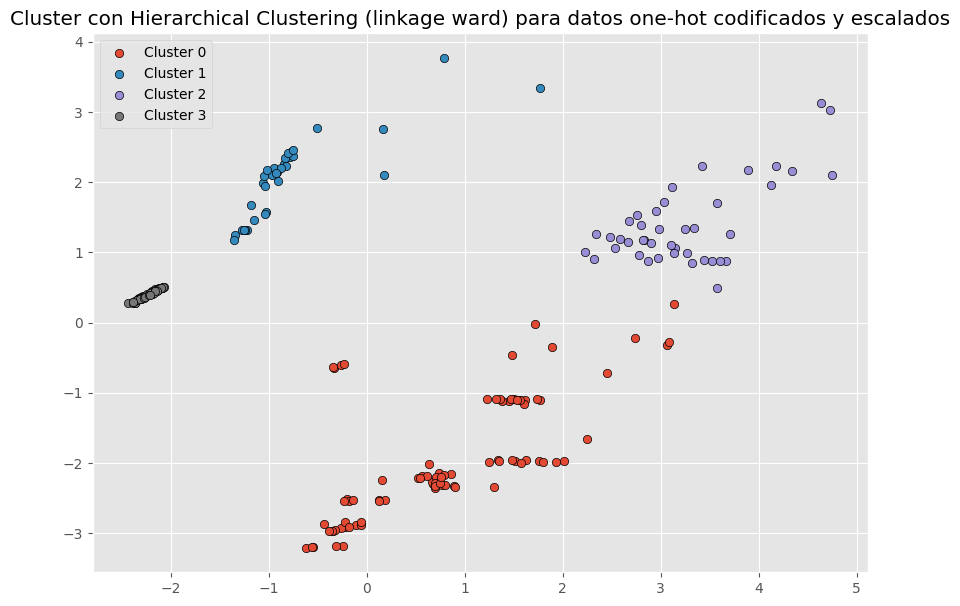

Tiempo de ejecución: 0.0019996166229248047 segundos
Silhouette Score: 0.7046251494177559


In [22]:
start = time.time()
# Clustering jerárquico
hc = AgglomerativeClustering(n_clusters=4, linkage = 'ward')
y_hc = hc.fit_predict(X_one_hot_pca)

end = time.time()

# Show the silhouette score
silhouette_hc = silhouette_score(X_one_hot_pca, y_hc)

plt.figure(figsize=(10, 7))
for i in np.unique(y_hc):
    plt.scatter(
        x = X_one_hot_pca[np.array(y_hc) == i, 0],
        y = X_one_hot_pca[np.array(y_hc) == i, 1],
        c = plt.rcParams['axes.prop_cycle'].by_key()['color'][i % len(plt.rcParams['axes.prop_cycle'].by_key()['color'])],
        marker = 'o',
        edgecolor = 'black',
        label= f"Cluster {i}"
    )
plt.title('Cluster con Hierarchical Clustering (linkage ward) para datos one-hot codificados y escalados')
plt.legend()
plt.show()

print(f"Tiempo de ejecución: {end - start} segundos")
print(f"Silhouette Score: {silhouette_hc}")
 
times_score.append({"time": end - start, "algorithm": "Hierarchical Clustering (link ward) OHE"})
silhouette_scores.append({"score": silhouette_hc, "algorithm": "Hierarchical Clustering (link ward) OHE"})


### DBSCAN

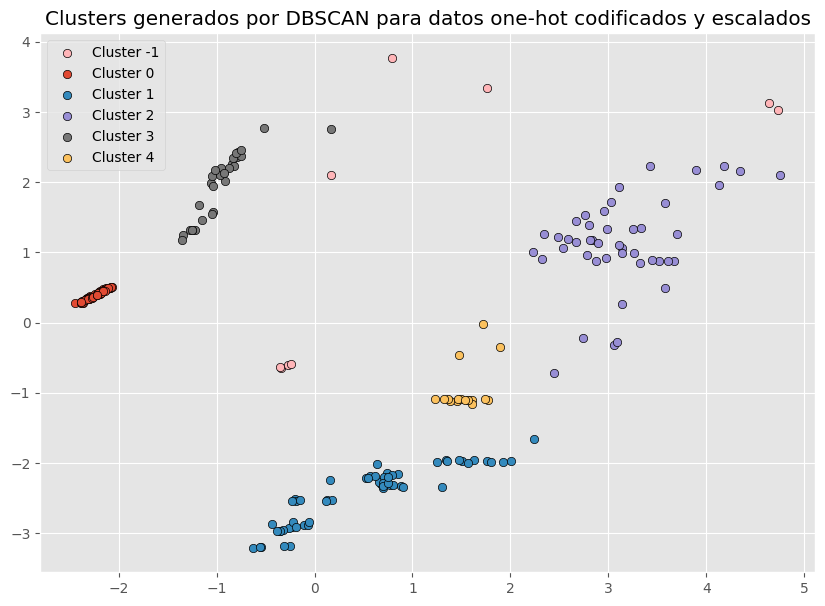

Tiempo de ejecución: 0.0030028820037841797 segundos
Silhouette Score: 0.6429750131963877


In [23]:
start = time.time()
# Entrenamos el modelo
dbscan = DBSCAN(eps=0.7, metric= 'euclidean')
dbscan.fit(X_one_hot_pca)

end = time.time()

# Show the silhouette score
silhouette_dbscan = silhouette_score(X_one_hot_pca, dbscan.labels_)

# Representamos los resultados
labels = dbscan.labels_
dbscan_OHE_labels = labels

# show clusters
plt.figure(figsize=(10, 7))
for i in np.unique(labels):
    plt.scatter(
        x = X_one_hot_pca[labels == i, 0],
        y = X_one_hot_pca[labels == i, 1],
        c = plt.rcParams['axes.prop_cycle'].by_key()['color'][i % len(plt.rcParams['axes.prop_cycle'].by_key()['color'])],
        marker = 'o',
        edgecolor = 'black',
        label= f"Cluster {i}"
    )

plt.title('Clusters generados por DBSCAN para datos one-hot codificados y escalados')
plt.legend()
plt.show()

print(f"Tiempo de ejecución: {end - start} segundos")
print(f"Silhouette Score: {silhouette_dbscan}")

times_score.append({"time": end - start, "algorithm": "DBSCAN OHE"})
silhouette_scores.append({"score": silhouette_dbscan, "algorithm": "DBSCAN OHE"})

## 3.3.- Modelos con Ordinal Encoding

Probamos los mismo modelos que el one hot encoding pero con los datos que transformamos antes a ordinal encoding

### Kmeans propio

Iteración final:  4
Centroides finales:  [[-0.29079621 -0.90770912]
 [-2.02205121 -0.10007725]
 [ 0.90999306 -1.31236532]
 [ 2.74960727  0.10699807]
 [-0.71666571  1.35725052]
 [ 0.06378674  3.05551488]]


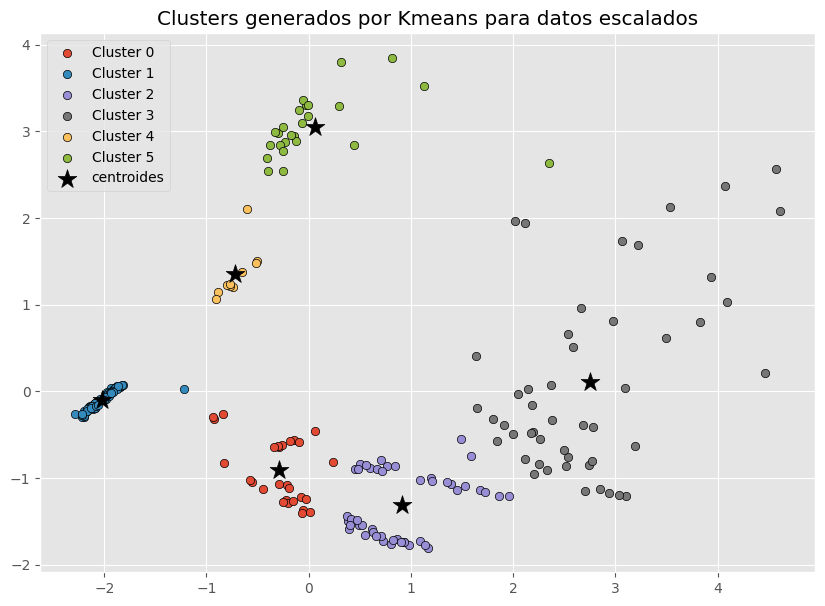

Tiempo de ejecución: 0.05469965934753418 segundos
Silhouette Score: 0.6019428774850948


In [24]:
n_clusters = 6
# Aplicar KMeans a los datos transformados por PCA
start = time.time()
centroides_oe, asignaciones_oe = kmeans(X_ordinal_pca, n_clusters)

end = time.time()

# Show the silhouette score
silhouette_oe = silhouette_score(X_ordinal_pca, asignaciones_oe)

plt.figure(figsize=(10, 7))
for i in np.unique(asignaciones_oe):
    plt.scatter(
        x = X_ordinal_pca[np.array(asignaciones_oe) == i, 0],
        y = X_ordinal_pca[np.array(asignaciones_oe) == i, 1],
        c = plt.rcParams['axes.prop_cycle'].by_key()['color'][i % len(plt.rcParams['axes.prop_cycle'].by_key()['color'])],
        marker = 'o',
        edgecolor = 'black',
        label= f"Cluster {i}"
    )

plt.scatter(
    x = centroides_oe[:, 0],
    y = centroides_oe[:, 1],
    c = 'black',
    s = 200,
    marker = '*',
    label  = 'centroides'
)
plt.title('Clusters generados por Kmeans para datos escalados')
plt.legend()
plt.show()
print(f"Tiempo de ejecución: {end - start} segundos")
print(f"Silhouette Score: {silhouette_oe}")

times_score.append({"time": end - start, "algorithm": "Custom Kmeans OE"})
silhouette_scores.append({"score": silhouette_oe, "algorithm": "Custom Kmeans OE"})

### Kmean scikit

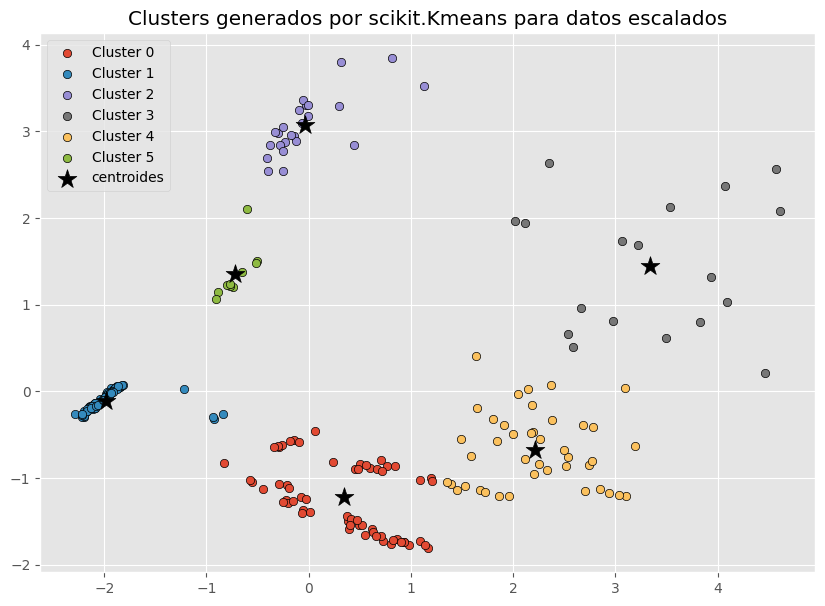

Tiempo de ejecución: 0.07077407836914062 segundos
Silhouette Score: 0.6605298437727174


In [25]:
start = time.time()
kmeans_scikit_oe = KMeans(n_clusters=6, random_state=23)
kmeans_scikit_oe.fit(X_ordinal_pca)
y_predict=kmeans_scikit_oe.predict(X_ordinal_pca)

end = time.time()

kmeans_oe_cluster = y_predict
# Show the silhouette score
silhouette = silhouette_score(X_ordinal_pca, y_predict)

plt.figure(figsize=(10, 7))
for i in np.unique(y_predict):
    plt.scatter(
        x = X_ordinal_pca[np.array(y_predict) == i, 0],
        y = X_ordinal_pca[np.array(y_predict) == i, 1],
        c = plt.rcParams['axes.prop_cycle'].by_key()['color'][i % len(plt.rcParams['axes.prop_cycle'].by_key()['color'])],
        marker = 'o',
        edgecolor = 'black',
        label= f"Cluster {i}"
    )

plt.scatter(
    kmeans_scikit_oe.cluster_centers_[:, 0],
    kmeans_scikit_oe.cluster_centers_[:, 1],
    s = 200,
    c = 'black',
    marker = '*',
    label  = 'centroides'
)
plt.title('Clusters generados por scikit.Kmeans para datos escalados')
plt.legend()
plt.show()
print(f"Tiempo de ejecución: {end - start} segundos")
print(f"Silhouette Score: {silhouette}")

times_score.append({"time": end - start, "algorithm": "KMeans scikit-learn OE"})
silhouette_scores.append({"score": silhouette, "algorithm": "KMeans scikit-learn OE"})

Al igual que lo mencionado anteriormente, hay ligeras diferencias entre lo clusters creados. Sin embargo, se puede observar que para los datos ordinales hay muchas más semejanzas entre los clusters creados por ambos modelos de clustering.

### Hierarchical Clustering

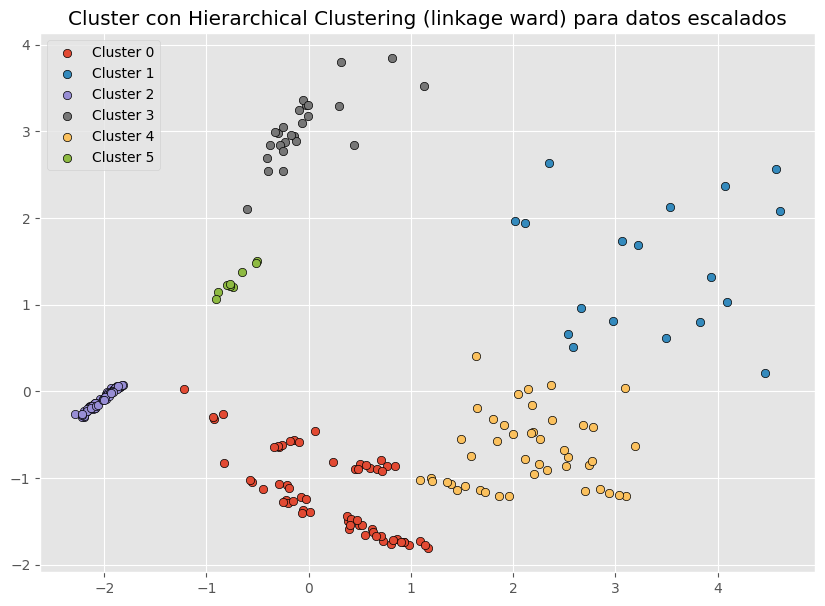

Tiempo de ejecución: 0.002002716064453125 segundos
Silhouette Score: 0.6485576686067179


In [26]:
# Clustering jerárquico
start = time.time()
hc = AgglomerativeClustering(n_clusters=6, linkage = 'ward')
y_hc = hc.fit_predict(X_ordinal_pca)

end = time.time()

hierarchical_oe_cluster = y_hc
# Show the silhouette score
silhouette_hc = silhouette_score(X_ordinal_pca, y_hc)

plt.figure(figsize=(10, 7))

for i in np.unique(y_hc):
    plt.scatter(
        x = X_ordinal_pca[np.array(y_hc) == i, 0],
        y = X_ordinal_pca[np.array(y_hc) == i, 1],
        c = plt.rcParams['axes.prop_cycle'].by_key()['color'][i % len(plt.rcParams['axes.prop_cycle'].by_key()['color'])],
        marker = 'o',
        edgecolor = 'black',
        label= f"Cluster {i}"
    )
plt.title('Cluster con Hierarchical Clustering (linkage ward) para datos escalados')
plt.legend()
plt.show()

print(f"Tiempo de ejecución: {end - start} segundos")
print(f"Silhouette Score: {silhouette_hc}")

times_score.append({"time": end - start, "algorithm": "Hierarchical Clustering (link ward) OE"})
silhouette_scores.append({"score": silhouette_hc, "algorithm": "Hierarchical Clustering (link ward) OE"})

### DBSCAN

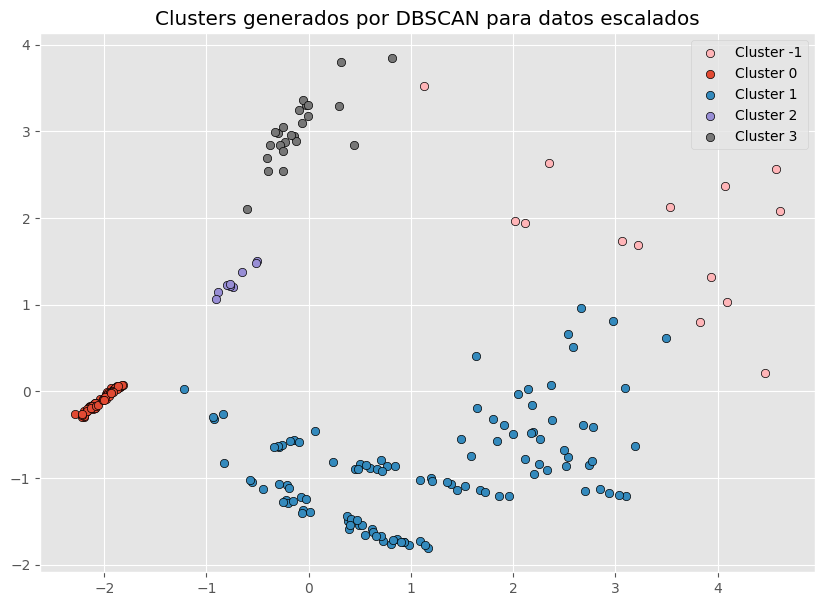

Tiempo de ejecución: 0.0009732246398925781 segundos
Silhouette Score: 0.593620565519156


In [27]:
# dbscan
start = time.time()
dbscan = DBSCAN(eps=0.6, metric= 'euclidean')
dbscan.fit(X_ordinal_pca)

end = time.time()

# Show the silhouette score
silhouette_dbscan = silhouette_score(X_ordinal_pca, dbscan.labels_)

labels = dbscan.labels_

# show clusters
plt.figure(figsize=(10, 7))
for i in np.unique(labels):
    plt.scatter(
        x = X_ordinal_pca[labels == i, 0],
        y = X_ordinal_pca[labels == i, 1],
        c = plt.rcParams['axes.prop_cycle'].by_key()['color'][i % len(plt.rcParams['axes.prop_cycle'].by_key()['color'])],
        marker = 'o',
        edgecolor = 'black',
        label= f"Cluster {i}"
    )

plt.title('Clusters generados por DBSCAN para datos escalados')
plt.legend()
plt.show()

print(f"Tiempo de ejecución: {end - start} segundos")
print(f"Silhouette Score: {silhouette_dbscan}")

times_score.append({"time": end - start, "algorithm": "DBSCAN OE"})
silhouette_scores.append({"score": silhouette_dbscan, "algorithm": "DBSCAN OE"})

# 4.- Comparación entre One Hot Encoding (OHE) y Ordinal Encoding (OE)

[{'score': 0.6400466302609082, 'algorithm': 'Custom Kmeans'}, {'score': 0.7272977616753254, 'algorithm': 'KMeans scikit-learn OHE'}, {'score': 0.7046251494177559, 'algorithm': 'Hierarchical Clustering (link ward) OHE'}, {'score': 0.6429750131963877, 'algorithm': 'DBSCAN OHE'}, {'score': 0.6019428774850948, 'algorithm': 'Custom Kmeans OE'}, {'score': 0.6605298437727174, 'algorithm': 'KMeans scikit-learn OE'}, {'score': 0.6485576686067179, 'algorithm': 'Hierarchical Clustering (link ward) OE'}, {'score': 0.593620565519156, 'algorithm': 'DBSCAN OE'}]


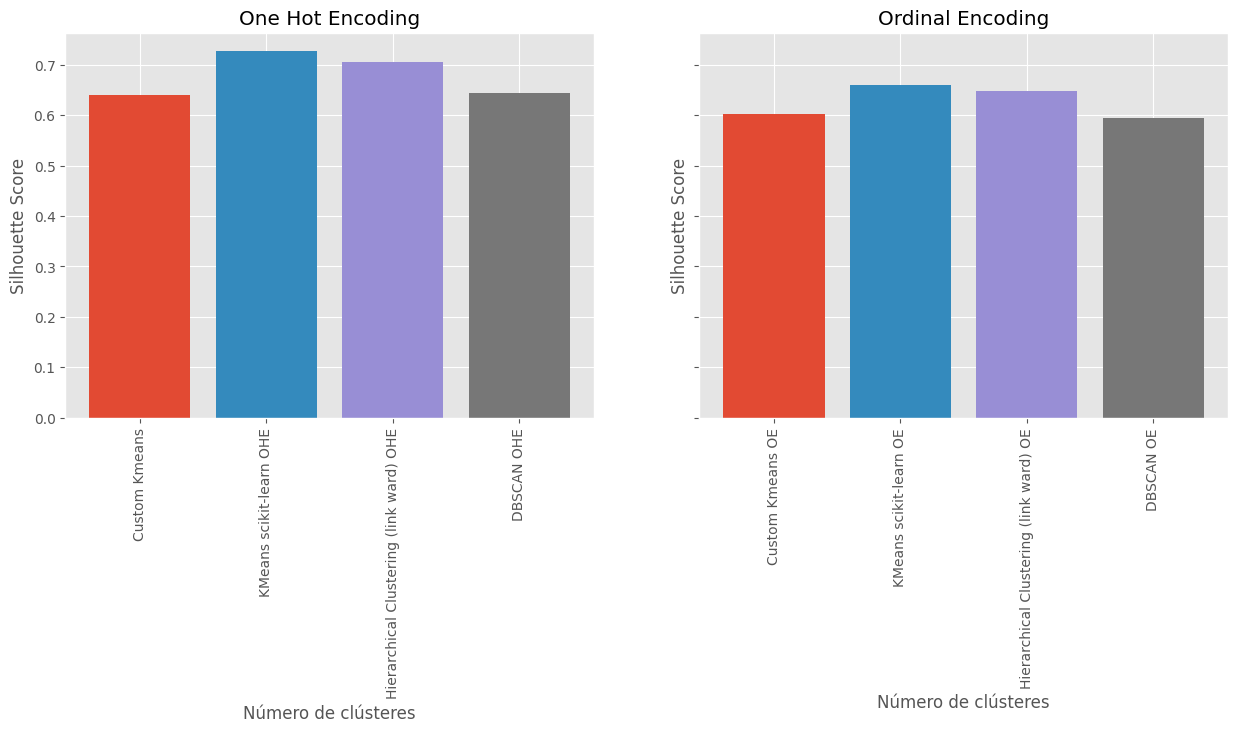

In [28]:
# Muestra en dos graficas el silhouette score para one hot encoding y ordinal encoding
fig, axs = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
print(silhouette_scores)
for i in range(4):
    axs[0].bar(silhouette_scores[i]['algorithm'], silhouette_scores[i]['score'])
axs[0].set_title('One Hot Encoding')
axs[0].set_ylabel('Silhouette Score')
axs[0].set_xlabel('Número de clústeres')

for i in range(4):
    axs[1].bar(silhouette_scores[i+4]['algorithm'], silhouette_scores[i+4]['score'])
axs[1].set_title('Ordinal Encoding')
axs[1].set_ylabel('Silhouette Score')
axs[1].set_xlabel('Número de clústeres')

for ax in axs:
    plt.sca(ax)
    plt.xticks(rotation=90)


El One-Hot Encoding convierte cada valor único de una variable categórica en una nueva columna binaria (0 o 1). Lo que hace es permitirnos saber sobre la presencia o ausencia de una categoría. Lo malo en nuestro caso sobre las estrellas es que no impone una relación de orden entre las categorías y aumenta considerablemente la dimensión de nuestros datos ya que crea una nueva columna por cada color. El One-hot encoding introduce multicolinealidad, lo que puede ser problemático en algunos algoritmos de clustering.

El Ordinal Encoding se basa en asignar un número entero a cada categoría única de forma ordinal, es decir en nuestro caso nos basamos en el orden dado para asignares un valor entre el 0 y el 8. Lo bueno de esta forma es que reduce la dimensionalidad de los datos en comparación con el one-hot encoding y nos ayuda en el cálculo de distancias al mantener el orden que existe en los datos. El único inconveniente es que no captura la distancia entre las categorías de forma precisa, lo que podría afectar negativamente al clustering.

Vemos en nuestro caso que no hay mucha diferencia entre hacer clustering con los datos transformados haciendo ordinal encoding y one-hot encoding, podemos observar en este gráfico que los scores del metodo de silueta es mas elevado para los datos transformados mediante One Hot Encoding. Esto se puede deber a que al hace OHE la dimensionalidad de los datos aumenta, y al hacer pca y reducir la dimensionalidad de los datos permite capturar una mayor varianza en solo dos variables. Al unir las variables con el PCA nos sirve un poco más el método one-hot encoding pero si lo hubieramos hecho solo con esas variables nos serviría mejor el ordinal encoding ya que nos ayuda a un mejor cálculo de la distancia.

# 5.- Pipeline con el mejor modelo

## 5.1.- Analisis de los resultados

Mostramos los resultados obtenidos para cada modelo

Tiempos de ejecución de los algoritmos:


,time,algorithm
0,0.033145,Custom Kmeans
1,0.024649,KMeans scikit-learn OHE
2,0.002000,Hierarchical Clustering (link ward) OHE
3,0.003003,DBSCAN OHE
4,0.054700,Custom Kmeans OE
5,0.070774,KMeans scikit-learn OE
6,0.002003,Hierarchical Clustering (link ward) OE
7,0.000973,DBSCAN OE


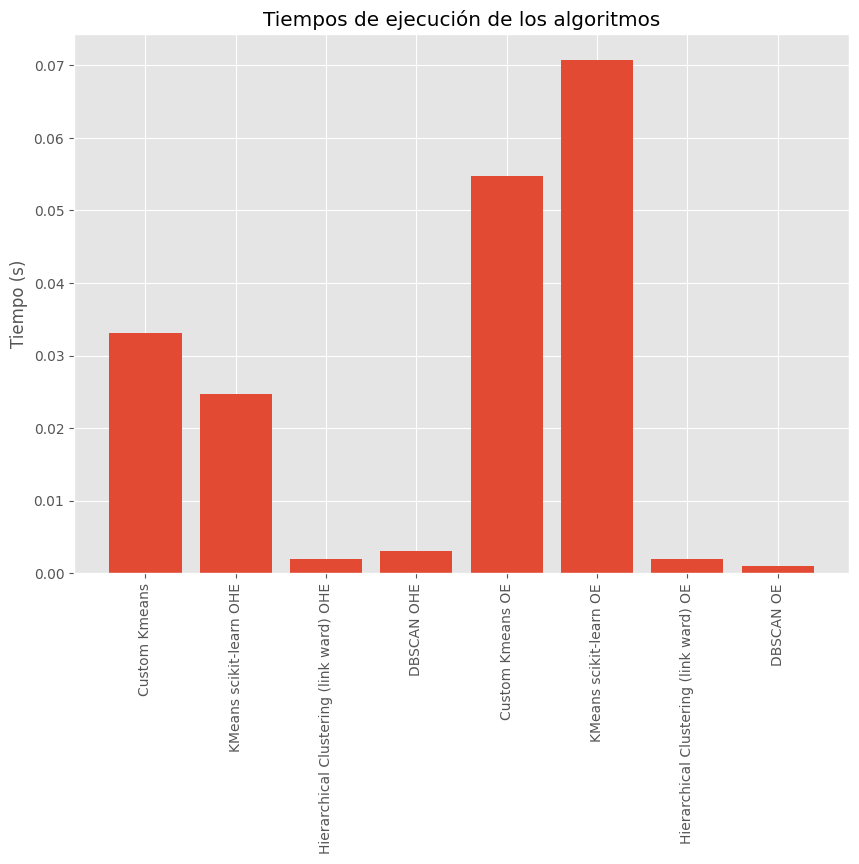

In [29]:
# Show the results
times_score_df = pd.DataFrame(times_score)

print("Tiempos de ejecución de los algoritmos:")
display(times_score_df)

# Bar plot
plt.figure(figsize=(10, 7))
plt.bar(times_score_df.algorithm, times_score_df.time)
plt.title('Tiempos de ejecución de los algoritmos')
plt.ylabel('Tiempo (s)')
plt.xticks(rotation=90)
plt.show()

Tras ver los tiempos de ejecución vemos claramente que nuestro K-means es el algoritmo mas costoso en cuanto al tiempo.Luego iria el DBSCAN, el K-means de scikit-learn y por el último el que menos tarda el hierarchical clustering. Si nuestro análisis lo basaramos solo en el score del tiempo (ya que necesitamos el modelo más rápido) el modelo que más nos interesaria sería el Hierarchical. Aunque, los tiempos de ejecución no son significativamente grandes por lo que no son tan importantes para la decisión del mejor modelo.

Silhouette Scores de los algoritmos:


,score,algorithm
0,0.640047,Custom Kmeans
1,0.727298,KMeans scikit-learn OHE
2,0.704625,Hierarchical Clustering (link ward) OHE
3,0.642975,DBSCAN OHE
4,0.601943,Custom Kmeans OE
5,0.660530,KMeans scikit-learn OE
6,0.648558,Hierarchical Clustering (link ward) OE
7,0.593621,DBSCAN OE


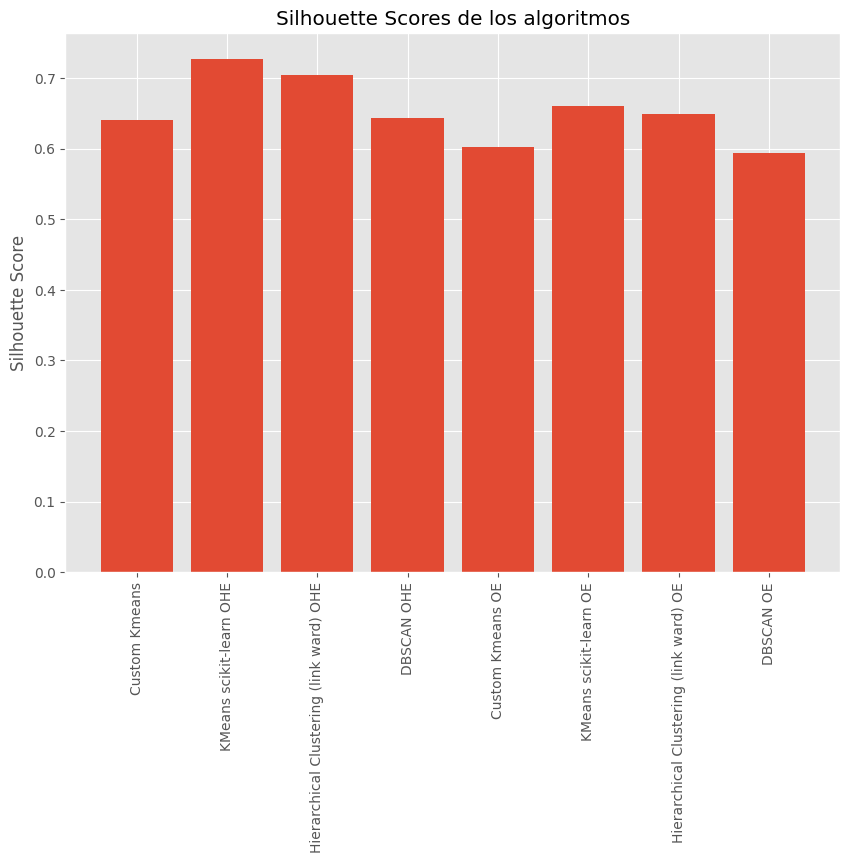

In [30]:
# Show the results
silhouette_scores_df = pd.DataFrame(silhouette_scores)

print("Silhouette Scores de los algoritmos:")
display(silhouette_scores_df)

# Bar plot
plt.figure(figsize=(10, 7))
plt.bar(silhouette_scores_df.algorithm, silhouette_scores_df.score)
plt.title('Silhouette Scores de los algoritmos')
plt.ylabel('Silhouette Score')
plt.xticks(rotation=90)
plt.show()

El silhouette score nos ayuda a saber que modelo se ajusta mejor a nuestros datos, teniendo en cuenta los cluster. Es una medida que se utiliza para evaluar la calidad de un clustering de datos. Proporciona una medida de cuán bien están separados los clusters en comparación con cuán similares son los puntos dentro del mismo cluster. En resumen, el silhouette score nos ayuda a determinar qué tan bien se han formado los clusters y si los datos realmente pertenecen a esos clusters. El silhouette score nos ayuda a evaluar la calidad y la coherencia de un clustering. Nos ayuda a comparar los diferentes algoritmos de clustering y seleccionar la mejor para nuestros datos. Vemos que el mejor modelo es el K-means de scikit-learn para los datos transformados haciendo One-hot encoding.

## 5.2.- Pipeline del Mejor Modelo

Al ser el modelo que más se ajusta a nuestros datos y que mejor clustering tiene según el análisis que nos proporciona el silhouette score, hacemos la pipeline de esto modelo siendo el modelo más óptimo, para poder obtener los resultados sobre los datos originales hay que hacer previamente antes de llamar a la pipeline el mapeado de la columna *'Color'* y la columna *'Espectral Class'* y aplicar el One Hot Encoding.

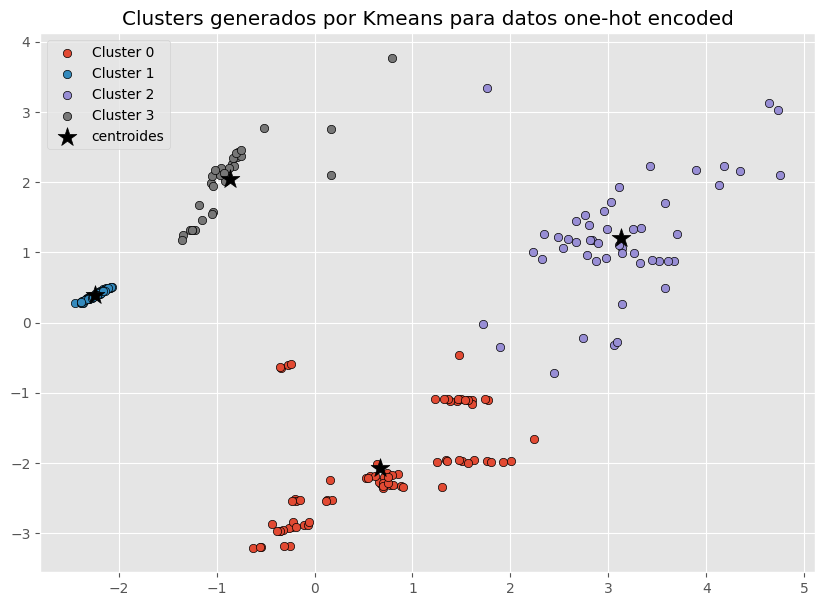

In [31]:
# pipeline del kmean de sci-kit learn para los datos one hot encoded

from sklearn.pipeline import Pipeline

# Creamos la pipeline
kmeans_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=2)),
    ('kmeans', KMeans(n_clusters=4, random_state=23))
])

# Entrenamos la pipeline y los resultados
y_predict = kmeans_pipeline.fit_predict(one_hot_df)
plt.figure(figsize=(10, 7))
for i in np.unique(y_predict):
    plt.scatter(
        x = X_one_hot_pca[y_predict == i, 0],
        y = X_one_hot_pca[y_predict == i, 1],
        c = plt.rcParams['axes.prop_cycle'].by_key()['color'][i % len(plt.rcParams['axes.prop_cycle'].by_key()['color'])],
        marker    = 'o',
        edgecolor = 'black',
        label= f"Cluster {i}"
    )

plt.scatter(
    x = kmeans_pipeline.named_steps['kmeans'].cluster_centers_[:, 0],
    y = kmeans_pipeline.named_steps['kmeans'].cluster_centers_[:, 1],
    c = 'black',
    s = 200,
    marker = '*',
    label  = 'centroides'
)
plt.title('Clusters generados por Kmeans para datos one-hot encoded')
plt.legend()
plt.show()




# 6.- Analisis de los grupos obtenidos sobre grupos habituales

Partiendo de una clasificación de habitual por parte de los astrónomos vamos a comparar estos datos con los grupos creados en la creación de los clusters por cada modelo.


Clase Temperatura L R A_M Color Clase Espectral

- Enana roja 3.000 7,0∙10^-4 1,0∙10^-1 +17.5 rojo K-M

- Enana marrón 3.300 5,5∙10^-3 3,5∙10^-1 +12.5 rojo M

- Enana blanca 14.000 2,5∙10^-3 1,0∙10^-2 +12.6 blanca B-G

- Estrella en secuencia 16.000 3.2∙10^4 4,4 -0.4 blancaamarilla B-M

- Super gigante 15.000 3.0∙10^5 5,0∙10 -6.4 blancaamarilla B-M

- Hiper gigante 11.000 3.0∙10^5 1,4∙10^3 -9.6 amarilla B-M

# 6.1.- Kmeans y Hierarchical para One Hot Encoding

A primera vista estos modelos generan una mejor agrupación para un valor de 4 clusters. Por otro lado los astrónomos suelen clasificar las estrellas en 6 grupos diferentes. Esto significa que la agrupación no es adecuada si las comparamos. 

## 6.2.- DBscan para One Hot Encoding

Si observamos la agrupación generada DBscan genera 5 clusters más el cluster para outliers si comparamos los resultados:

In [32]:
# Añadimos la columna cluster a los datos originales
dbscan_OHE_df = data_df.copy()

dbscan_OHE_df['cluster'] = dbscan_OHE_labels

print("Datos con el cluster asignado por DBSCAN:")
display(dbscan_OHE_df)

Datos con el cluster asignado por DBSCAN:


,Temperature,L,R,A_M,Color,Spectral_Class,cluster
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,Blue,O,2
236,30839,834042.000000,1194.0000,-10.63,Blue,O,-1
237,8829,537493.000000,1423.0000,-10.73,White,A,4
238,9235,404940.000000,1112.0000,-11.23,White,A,4


In [33]:
print("DbScan")
for i in np.unique(dbscan_OHE_labels):
    print(f"Cluster {i}")
    display(dbscan_OHE_df[dbscan_OHE_df['cluster'] == i].head())
    describe=dbscan_OHE_df[dbscan_OHE_df['cluster'] == i].describe()
    display(describe.loc["mean"])
    

DbScan
Cluster -1


,Temperature,L,R,A_M,Color,Spectral_Class,cluster
53,3749,550000.000,1648.000,-8.050,Orange,M,-1
91,4526,0.153,0.865,6.506,Yellow,K,-1
92,4077,0.085,0.795,6.228,Yellow,K,-1
93,4980,0.357,1.130,4.780,Yellow,K,-1
96,5112,0.630,0.876,4.680,Orange-Red,K,-1


Temperature     10452.666667
L              327163.691667
R                 849.240667
A_M                -3.101778
cluster            -1.000000
Name: mean, dtype: float64

Cluster 0


,Temperature,L,R,A_M,Color,Spectral_Class,cluster
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0


Temperature    3140.887500
L                 0.003050
R                 0.229080
A_M              15.051738
cluster           0.000000
Name: mean, dtype: float64

Cluster 1


,Temperature,L,R,A_M,Color,Spectral_Class,cluster
20,25000,0.05600,0.00840,10.58,Blue-White,B,1
21,7740,0.00049,0.01234,14.02,White,A,1
22,7220,0.00017,0.01100,14.23,White,F,1
23,8500,0.00050,0.01000,14.50,White,A,1
24,16500,0.01300,0.01400,11.89,Blue-White,B,1


Temperature    13053.637931
L               5272.315627
R                  2.302376
A_M                5.808086
cluster            1.000000
Name: mean, dtype: float64

Cluster 2


,Temperature,L,R,A_M,Color,Spectral_Class,cluster
30,39000,204000.0,10.6,-4.70,Blue,O,2
49,33750,220000.0,26.0,-6.10,Blue,B,2
99,36108,198000.0,10.2,-4.40,Blue,O,2
100,33300,240000.0,12.0,-6.50,Blue,B,2
101,40000,813000.0,14.0,-6.23,Blue,O,2


Temperature     22661.400000
L              327677.911111
R                 308.817489
A_M                -6.587044
cluster             2.000000
Name: mean, dtype: float64

Cluster 3


,Temperature,L,R,A_M,Color,Spectral_Class,cluster
40,3826,200000.0,19.0,-6.93,Red,M,3
41,3365,340000.0,23.0,-6.20,Red,M,3
42,3270,150000.0,88.0,-6.02,Red,M,3
43,3200,195000.0,17.0,-7.22,Red,M,3
44,3008,280000.0,25.0,-6.00,Red,M,3


Temperature      3657.870968
L              209580.645161
R                 974.290323
A_M                -8.946129
cluster             3.000000
Name: mean, dtype: float64

Cluster 4


,Temperature,L,R,A_M,Color,Spectral_Class,cluster
89,19860,0.0011,0.01310,11.34,Blue,B,4
141,21020,0.0015,0.01120,11.52,Blue,B,4
142,18290,0.0013,0.00934,12.78,Blue,B,4
177,11000,170000.0000,1779.00000,-9.90,Blue-White,B,4
178,12100,120000.0000,708.90000,-7.84,Blue-White,B,4


Temperature    16692.823529
L              72496.059821
R                295.473548
A_M                6.613529
cluster            4.000000
Name: mean, dtype: float64

Buscando comparar nuestra agrupación hecha por el algoritmo Dbscan de clustering con la agrupación hecha por los astrónomos, hemos decidido utilizar la media de los valores asociados a cada cluster.

Cluster -1: 
- Temperature     10452.666667
- L              327163.691667
- R                 849.240667
- A_M                -3.101778

Cluster 0:
- Temperature    3140.887500
- L                 0.003050
- R                 0.229080
- A_M              15.051738

Cluster 1:
- Temperature    13053.637931
- L               5272.315627
- R                  2.302376
- A_M                5.808086

Cluster 2:
- Temperature     22661.400000
- L              327677.911111
- R                 308.817489
- A_M                -6.587044

Cluster 3:
- Temperature      3657.870968
- L              209580.645161
- R                 974.290323
- A_M                -8.946129

Cluster 4:
- Temperature    16692.823529
- L              72496.059821
- R                295.473548
- A_M                6.613529

Si los datos son similares a los que usaron los astrónomos para hacer la media entre los valores de estrellas similares nuestros valores para los clusters deberian ser similares a los de las clases de diferentes estrellas. Vamos a ver si nuestros clusters se acercan a alguna clase de estrella:

cluster -1 -> Hiper Gigante.

cluster 0 -> Enana roja o Enana marrón.

cluster 1 -> Super gigante o Estrella en secuencia.

cluster 2 -> Super gigante.

cluster 3 -> Hiper Gigante.

Pero si miramos a la tabla vemos que el color de las estrellas de esa clase es rojo así que habría que mirar bien los datos originales para ver porque no se asemeja a ninguna clase.

cluster 4 -> Estrella en secuencia o a la clase Super gigante 

Pero vemos que el valor A_M esta fuera del rango de esas estrellas.

A parte de mirar los datos, si miramos la tabla vemos que el valor del color para los valores de la clase, el color de la estrella nos da un buen indicador de si nuestro cluster se asemeja al de los astrónomos.

Sin embargo, comparar estos clusteres con las clasificaciones propias de los astronomos no es adecuado ya que DBscan crea un cluster para aquellas variables que no han sido capaces de agruparse debido a la distancia que la separa de los demás clusters. Por lo que este cluster es una conglomeración de variables que pueden llegar a pertenecer a otras agrupaciones más apropiadas.

## 6.3.- Kmeans para Ordinal Encoding

In [34]:
# Add to the dataframe the cluster column
Kmeans_df = data_df.copy()

Kmeans_df['cluster'] = kmeans_oe_cluster

# Show the results
print("Datos con el cluster asignado por Kmeans:")
display(Kmeans_df)

Datos con el cluster asignado por Kmeans:


,Temperature,L,R,A_M,Color,Spectral_Class,cluster
0,3068,0.002400,0.1700,16.12,Red,M,1
1,3042,0.000500,0.1542,16.60,Red,M,1
2,2600,0.000300,0.1020,18.70,Red,M,1
3,2800,0.000200,0.1600,16.65,Red,M,1
4,1939,0.000138,0.1030,20.06,Red,M,1
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,Blue,O,3
236,30839,834042.000000,1194.0000,-10.63,Blue,O,3
237,8829,537493.000000,1423.0000,-10.73,White,A,3
238,9235,404940.000000,1112.0000,-11.23,White,A,3


In [35]:
# Kmeans
print("Kmeans")
for i in np.unique(kmeans_oe_cluster):
    print(f"Cluster {i}")
    display(Kmeans_df[Kmeans_df['cluster'] == i].head())
    describe=Kmeans_df[Kmeans_df['cluster'] == i].describe()
    display(describe.loc["mean"])


Kmeans
Cluster 0


,Temperature,L,R,A_M,Color,Spectral_Class,cluster
20,25000,0.05600,0.00840,10.58,Blue-White,B,0
21,7740,0.00049,0.01234,14.02,White,A,0
22,7220,0.00017,0.01100,14.23,White,F,0
23,8500,0.00050,0.01000,14.50,White,A,0
24,16500,0.01300,0.01400,11.89,Blue-White,B,0


Temperature    12522.145161
L                133.972957
R                  1.254002
A_M                8.415790
cluster            0.000000
Name: mean, dtype: float64

Cluster 1


,Temperature,L,R,A_M,Color,Spectral_Class,cluster
0,3068,0.002400,0.1700,16.12,Red,M,1
1,3042,0.000500,0.1542,16.60,Red,M,1
2,2600,0.000300,0.1020,18.70,Red,M,1
3,2800,0.000200,0.1600,16.65,Red,M,1
4,1939,0.000138,0.1030,20.06,Red,M,1


Temperature    3213.880952
L                 0.017488
R                 0.261814
A_M              14.599202
cluster           1.000000
Name: mean, dtype: float64

Cluster 2


,Temperature,L,R,A_M,Color,Spectral_Class,cluster
50,3490,270000.0,1520.0,-9.40,Red,M,2
51,3750,283000.0,1260.0,-7.63,Red,M,2
52,3834,272000.0,1183.0,-9.20,Red,M,2
53,3749,550000.0,1648.0,-8.05,Orange,M,2
54,3650,310000.0,1324.0,-7.79,Red,M,2


Temperature      3782.375000
L              245541.666667
R                1391.875000
A_M                -9.916250
cluster             2.000000
Name: mean, dtype: float64

Cluster 3


,Temperature,L,R,A_M,Color,Spectral_Class,cluster
101,40000,813000.0,14.0,-6.23,Blue,O,3
173,26000,316000.0,1679.0,-9.10,Blue,B,3
176,18000,200000.0,1045.0,-8.30,Blue,O,3
177,11000,170000.0,1779.0,-9.90,Blue-White,B,3
179,24490,248490.0,1134.5,-8.24,Blue-White,B,3


Temperature     24015.888889
L              512365.611111
R                1105.388889
A_M                -8.730667
cluster             3.000000
Name: mean, dtype: float64

Cluster 4


,Temperature,L,R,A_M,Color,Spectral_Class,cluster
30,39000,204000.0,10.6,-4.7,Blue,O,4
31,30000,28840.0,6.3,-4.2,Blue-White,B,4
49,33750,220000.0,26.0,-6.1,Blue,B,4
99,36108,198000.0,10.2,-4.4,Blue,O,4
100,33300,240000.0,12.0,-6.5,Blue,B,4


Temperature     21793.357143
L              203221.857143
R                  52.883976
A_M                -5.552738
cluster             4.000000
Name: mean, dtype: float64

Cluster 5


,Temperature,L,R,A_M,Color,Spectral_Class,cluster
40,3826,200000.0,19.0,-6.93,Red,M,5
41,3365,340000.0,23.0,-6.20,Red,M,5
42,3270,150000.0,88.0,-6.02,Red,M,5
43,3200,195000.0,17.0,-7.22,Red,M,5
44,3008,280000.0,25.0,-6.00,Red,M,5


Temperature      3466.800
L              206600.000
R                 129.500
A_M                -6.798
cluster             5.000
Name: mean, dtype: float64

Buscando comparar nuestra agrupación hecha por el algoritmo K-means de clustering con la agrupación hecha por los astrónomos, hemos decidido utilizar la media de los valores asociados a cada cluster.

Cluster 0: 
- Temperature    3171.421687
- L              3289.167156
- R                 1.833764
- A_M              14.409867

Cluster 1:
- Temperature     21483.275000
- L              232359.500000
- R                  83.007925
- A_M                -5.901925

Cluster 2:
- Temperature   3706.250000
- L              240187.500000
- R                1080.218750
- A_M                -9.161563

Cluster 3:
- Temperature     8088.678571
- L                 1.172341
- R                 0.501167
- A_M               9.517643

Cluster 4:
- Temperature      25274.625000
- L              526792.562500
- R                1173.250000
- A_M                -8.849375

Cluster 5:
- Temperature     15789.146341
- L               1051.514459
- R                  2.251596
- A_M                6.343878

Si buscamos cierta coherencia entre nuestras agrupaciones y las clasificaciones de los astrónomos podemos observar:

Cluster 0 -> Enana roja

Cluster 1 -> Super gigante

Cluster 2 -> Podria ser tanto como una Enana Marron y una Hiper gigante

Cluster 3 -> Hiper gigante

Cluster 4 -> Hiper gigante

Cluster 5 -> Enana blanca

Se han relacionado usando las medias de las columnas obtenidas por cada agrupación sin embargo no se ha tenido en cuenta las variables categóricas que aportan mayor profundidad a esta posible relación. Si analizamos estas variables categoricas vemos que hay dos clusteres que contienen mayoritariamente el color rojo mientras que los clusters restantes contienen en mayor numero el colo blanco y azul respectivamente. Ademas analizando la clase espectral podemos ver que los clusters generados no son tan dispares de los propuestos por los astrónomos. Cabe destacar que en la clasificsción de los cientificos hay ciertas variables categoricas que no se han contemplado en la clasificación como el color *azul* o la clase espectral *o* por lo que para este tipo de variables no hay una certeza en la agrupación.

## 6.4.- Hierarchical para Ordinal Encoding

In [36]:
# Add to the dataframe the cluster column
hierarchical_oe_df = data_df.copy()

hierarchical_oe_df['cluster'] = hierarchical_oe_cluster

# Show the results
print("Datos con el cluster asignado por Hierarchical Clustering:")
display(hierarchical_oe_df)

Datos con el cluster asignado por Hierarchical Clustering:


,Temperature,L,R,A_M,Color,Spectral_Class,cluster
0,3068,0.002400,0.1700,16.12,Red,M,2
1,3042,0.000500,0.1542,16.60,Red,M,2
2,2600,0.000300,0.1020,18.70,Red,M,2
3,2800,0.000200,0.1600,16.65,Red,M,2
4,1939,0.000138,0.1030,20.06,Red,M,2
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,Blue,O,1
236,30839,834042.000000,1194.0000,-10.63,Blue,O,1
237,8829,537493.000000,1423.0000,-10.73,White,A,1
238,9235,404940.000000,1112.0000,-11.23,White,A,1


In [37]:
# Hierarchical Clustering
print("Hierarchical Clustering")
for i in np.unique(hierarchical_oe_cluster):
    print(f"Cluster {i}")
    display(hierarchical_oe_df[hierarchical_oe_df['cluster'] == i].head())
    describe=hierarchical_oe_df[hierarchical_oe_df['cluster'] == i].describe()
    display(describe.loc["mean"])

Hierarchical Clustering
Cluster 0


,Temperature,L,R,A_M,Color,Spectral_Class,cluster
20,25000,0.05600,0.00840,10.58,Blue-White,B,0
21,7740,0.00049,0.01234,14.02,White,A,0
22,7220,0.00017,0.01100,14.23,White,F,0
23,8500,0.00050,0.01000,14.50,White,A,0
24,16500,0.01300,0.01400,11.89,Blue-White,B,0


Temperature    11845.428571
L                 79.532513
R                  0.998113
A_M                8.760365
cluster            0.000000
Name: mean, dtype: float64

Cluster 1


,Temperature,L,R,A_M,Color,Spectral_Class,cluster
101,40000,813000.0,14.0,-6.23,Blue,O,1
173,26000,316000.0,1679.0,-9.10,Blue,B,1
176,18000,200000.0,1045.0,-8.30,Blue,O,1
177,11000,170000.0,1779.0,-9.90,Blue-White,B,1
179,24490,248490.0,1134.5,-8.24,Blue-White,B,1


Temperature     24015.888889
L              512365.611111
R                1105.388889
A_M                -8.730667
cluster             1.000000
Name: mean, dtype: float64

Cluster 2


,Temperature,L,R,A_M,Color,Spectral_Class,cluster
0,3068,0.002400,0.1700,16.12,Red,M,2
1,3042,0.000500,0.1542,16.60,Red,M,2
2,2600,0.000300,0.1020,18.70,Red,M,2
3,2800,0.000200,0.1600,16.65,Red,M,2
4,1939,0.000138,0.1030,20.06,Red,M,2


Temperature    3140.887500
L                 0.003050
R                 0.229080
A_M              15.051738
cluster           2.000000
Name: mean, dtype: float64

Cluster 3


,Temperature,L,R,A_M,Color,Spectral_Class,cluster
50,3490,270000.0,1520.0,-9.40,Red,M,3
51,3750,283000.0,1260.0,-7.63,Red,M,3
52,3834,272000.0,1183.0,-9.20,Red,M,3
53,3749,550000.0,1648.0,-8.05,Orange,M,3
54,3650,310000.0,1324.0,-7.79,Red,M,3


Temperature      3776.0800
L              238680.0000
R                1371.2400
A_M                -9.9296
cluster             3.0000
Name: mean, dtype: float64

Cluster 4


,Temperature,L,R,A_M,Color,Spectral_Class,cluster
30,39000,204000.0,10.6,-4.70,Blue,O,4
31,30000,28840.0,6.3,-4.20,Blue-White,B,4
32,15276,1136.0,7.2,-1.97,Blue-White,B,4
49,33750,220000.0,26.0,-6.10,Blue,B,4
99,36108,198000.0,10.2,-4.40,Blue,O,4


Temperature     21425.044444
L              189747.000000
R                  49.770222
A_M                -5.358778
cluster             4.000000
Name: mean, dtype: float64

Cluster 5


,Temperature,L,R,A_M,Color,Spectral_Class,cluster
40,3826,200000.0,19.0,-6.93,Red,M,5
41,3365,340000.0,23.0,-6.20,Red,M,5
42,3270,150000.0,88.0,-6.02,Red,M,5
43,3200,195000.0,17.0,-7.22,Red,M,5
44,3008,280000.0,25.0,-6.00,Red,M,5


Temperature      3449.222222
L              221333.333333
R                  46.555556
A_M                -6.414444
cluster             5.000000
Name: mean, dtype: float64

Buscando comparar nuestra agrupación hecha por el algoritmo Hierarchical de clustering con la agrupación hecha por los astrónomos, hemos decidido utilizar la media de los valores asociados a cada cluster.

Cluster 0: 
- Temperature    11845.428571
- L                 79.532513
- R                  0.998113
- A_M                8.760365

Cluster 1:
- Temperature     24015.888889
- L              512365.611111
- R                1105.388889
- A_M                -8.730667

Cluster 2:
- Temperature   3140.887500
- L                 0.003050
- R                 0.229080
- A_M              15.051738

Cluster 3:
- Temperature     3776.0800
- L              238680.0000
- R                1371.2400
- A_M                -9.9296

Cluster 4:
- Temperature      21425.044444
- L              189747.000000
- R                  49.770222
- A_M                -5.358778

Cluster 5:
- Temperature     3449.222222
- L              221333.333333
- R                  46.555556
- A_M                -6.414444

Las relaciones encontradas pueden ser:

Cluster 0 -> Enana Blanca

Cluster 1 -> Hiper gigante

Cluster 2 -> Enana marrón

Cluster 3 -> Hiper gigante

Cluster 4 -> Super gigante

Cluster 5 -> Super gigante

Al igual que lo explicado anteriormente estas relaciones se han realizado mediante las medias de cada grupo generado. Si tenemos en cuenta las variables categóricas, vemos que aunque hay cierta relación entre los grupos asociados previamente surje la misma diferencia que encontramos y es que hay ciertos rangos y categorias que no han sido contempladas en la clasificación previa.

## 6.5.- DBscan para Ordinal Encoding

Al igual que en los primeros algoritmos para one hot encoding, DBscan genera 4 clusters y un cluster para los outliers por lo que no es adecuado un comparación entre nuestros grupos y la clasificación de los científicos.

## 6.6.- Conclusiones

A primera vista podemos observar que los clusteres generados por nuestros modelos son relativamente compatibles con la clasificación de la tabla por los astrónomos. Sin embargo, la clasificación original no contempla ciertos rangos y valores que pueden llegar a obtener estas variables por lo que no es del todo preciso.

## 7.- Uso de Chat GPT

En esta práctica el uso de chatGPT ha sido menor y solo se ha usado para preguntas mas teóricas, como el análisis de las gráficas o por el contrario para diferentes funcionalidades de la libreria scikit.learn. 